In [1]:
import requests
import json
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import squarify

## 1. Load CSV File 

In [2]:
raw_data = pd.read_csv('Profeco_Catalog.csv')
raw_data.head(1)

,Unnamed: 0,_id,cadenaComercial,catalogo,categoria,direccion,estado,fechaRegistro,giro,latitud,longitud,marca,municipio,nombreComercial,precio,presentacion,producto,razonSocial,rfc
0,0,571e4c002f232201006c6cac,HIPERMERCADO SORIANA,BASICOS,TORTILLAS Y DERIVADOS DEL MAIZ,"BLVD. ADOLFO LOPEZ MATEOS 1100, ESQ. CALAFIA, ...",BAJA CALIFORNIA,2015-02-10,TIENDA DE AUTOSERVICIO,32.641719,-115.469582,S/M,MEXICALI,SORIANA HIPER SUCURSAL CALAFIA,11.9,1 KG. GRANEL,TORTILLA DE MAIZ,NaN,NaN


## 2. Rename columns from Data Frame Loaded


In [3]:
master_frame = raw_data.drop(columns = ['giro','razonSocial','rfc','catalogo','Unnamed: 0','direccion','nombreComercial']).reset_index(drop=True).rename(index=str, columns={"_id": "ID", "cadenaComercial": "Cadena", "categoria": "Categoría", "estado": "Estado", "fechaRegistro": "Fecha", "latitud": "Latitud", "longitud": "Longitud", "marca": "Marca", "municipio": "Municipio", "precio": "Precio", "presentacion": "Presentación", "producto": "Producto"})
master_frame.head(1)

,ID,Cadena,Categoría,Estado,Fecha,Latitud,Longitud,Marca,Municipio,Precio,Presentación,Producto
0,571e4c002f232201006c6cac,HIPERMERCADO SORIANA,TORTILLAS Y DERIVADOS DEL MAIZ,BAJA CALIFORNIA,2015-02-10,32.641719,-115.469582,S/M,MEXICALI,11.9,1 KG. GRANEL,TORTILLA DE MAIZ


## Analyze registered products by year
Take this first step to see the year with more data. The information is not very constant.

In [4]:
year_registry = pd.DataFrame(master_frame.groupby('Fecha')['Fecha'].count())
year_registry.columns=['T']
year_registry.reset_index(inplace=True)
year_registry['Fecha'] = year_registry['Fecha'].apply(lambda x: str(x).split('-')[0])
year_registry.columns=['Año', 'Total Registrado']
year_registry

,Año,Total Registrado
0,2012,9063
1,2013,40539
2,2015,131192
3,2016,38788


# Line graph (1)
## Graph to see the apparent growth of products registered by year.

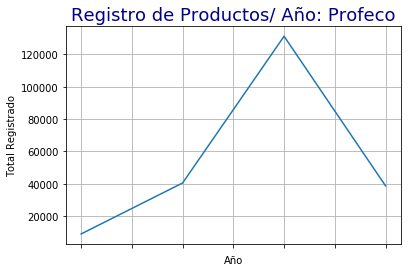

In [5]:
#plot
fig, ax = plt.subplots()
year_registry.plot(kind='line', x ='Año', y='Total Registrado', ax = ax, legend=False)
ax.set_title('Registro de Productos/ Año: Profeco',fontsize = 18, color= 'DarkBlue')
ax.set_ylabel('Total Registrado')
ax.grid()
plt.show()


## Get values from the categories with more data registered

In [6]:
master_2015frame = master_frame[(master_frame['Fecha'] == '2015-02-10')]
#master_2015frame
df_category = master_2015frame.groupby('Categoría')['Categoría'].count().nlargest(10)
df_category
category = master_frame.groupby('Categoría')['Categoría'].count().nlargest(10)
category

Categoría
MEDICAMENTOS                         41061
ARTS. PARA EL CUIDADO PERSONAL       16291
APARATOS ELECTRICOS                  13713
DETERGENTES Y PRODUCTOS SIMILARES    12235
DERIVADOS DE LECHE                   11074
CARNES FRIAS SECAS Y EMBUTIDOS       10901
APARATOS ELECTRONICOS                10070
CONDIMENTOS                           9655
REFRESCOS ENVASADOS                   9650
FRUTAS Y LEGUMBRES PROCESADAS         9319
Name: Categoría, dtype: int64

# Pie chart (2)
## Graph showing more relevant categories quantity

Text(0.5,1,'Registros por Categoria')

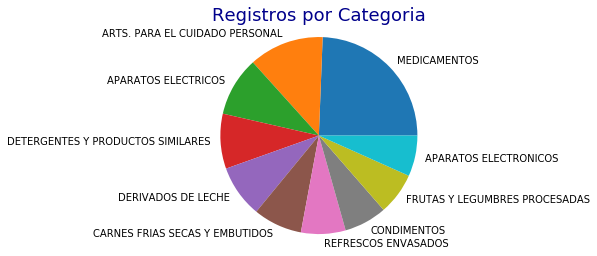

In [7]:
Category_Plot_pie = df_category.plot.pie()
Category_Plot_pie.axis('equal')
Category_Plot_pie.set_ylabel("")
Category_Plot_pie.set_xlabel("")
Category_Plot_pie.set_title('Registros por Categoria',fontsize = 18, color= 'DarkBlue')

# Category count by state (Top 5)

In [8]:
category_state = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Estado', 'Categoría'])['Categoría'].count().nlargest(5)
#category_state
category_total = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].count()
category_total = category_total['ID']
#category_total
top5_category = pd.DataFrame([category_state])
top5_category.columns = top5_category.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_category.transpose().reset_index()

,Estado,Categoría
0,DISTRITO FEDERAL,4558
1,MÉXICO,4223
2,GUANAJUATO,1992
3,NUEVO LEÓN,1558
4,JALISCO,1328


# Bar graph (3)
## Display of the top 5 Categoties by state

Text(0.5,1,'Categorias por Estado')

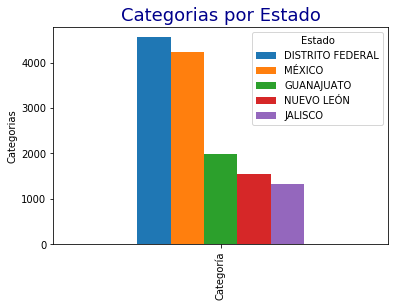

In [9]:
Top5Chart = top5_category.plot.bar()
Top5Chart.set_ylabel('Categorias')
Top5Chart.set_title('Categorias por Estado', fontsize = 18, color= 'DarkBlue')

# Pie Chart (4)
## Total percentage of medicine products grouped by state (Top 5)

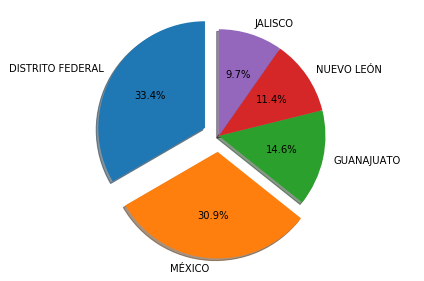

In [10]:
category_transpose = top5_category.transpose().reset_index()
category_transpose['Porcentaje'] = (category_transpose['Categoría'] / category_total)*100
#other = category_total - top5_category
#top5_categoryperc.reset_index(inplace=False)
#category_transpose= category_transpose.style.format("{:.2%}")
#category_transpose.plot(kind='bar',y='Porcentaje', x='Estado')
#plt.show()
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    category_transpose['Porcentaje'],
    # with the labels being officer names
    labels=category_transpose['Estado'],
    # with no shadows
    shadow=True,
    # with colors

    # with one slide exploded out
    explode=(0.15, 0.15, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## Gráfica 5
### Precio promedio de medicamentos 2015 por top 5 (max precio)
Gráfica que ponga el top 5 de los estados con mayor precio en Mexico

In [11]:
avg_medprice = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Categoría'])['Precio'].mean().nlargest(32)
#avg_medprice = avg_medprice['ID']
avg_medprice = avg_medprice['MEDICAMENTOS']
print('Precio promedio de medicamento: ' + str(avg_medprice))

Precio promedio de medicamento: 379.6187374517428


In [12]:
avg_price = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Estado', 'Categoría'])['Precio'].mean().nlargest(5)
avg_price_df = pd.DataFrame(avg_price)
avg_price_df = avg_price_df.reset_index()
avg_price_df

,Estado,Categoría,Precio
0,SINALOA,MEDICAMENTOS,430.158429
1,M��XICO,MEDICAMENTOS,421.190000
2,SONORA,MEDICAMENTOS,416.815631
3,MICHOACÁN DE OCAMPO,MEDICAMENTOS,415.290411
4,DISTRITO FEDERAL,MEDICAMENTOS,405.847330


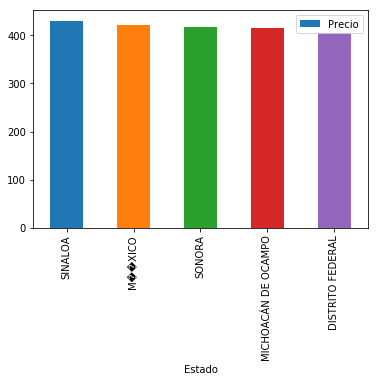

In [13]:
avg_price_df.plot(kind='bar', y = 'Precio', x ='Estado')
plt.show()

# Square graph (6)
## Average price of medicines with highest price in top 5. Selected by state


In [14]:
top5_price = pd.DataFrame([avg_price])
top5_price.columns = top5_price.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_price.transpose()

,Precio
Estado,
SINALOA,430.158429
M��XICO,421.190000
SONORA,416.815631
MICHOACÁN DE OCAMPO,415.290411
DISTRITO FEDERAL,405.847330


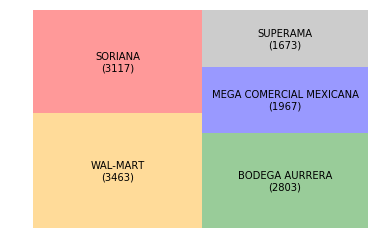

In [15]:
chain_category = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Cadena', 'Categoría'])['Categoría'].count().nlargest(5)
#chain_category
chain_category_df = pd.DataFrame(chain_category)
#chain_category_df.reset_index(inplace=True)
chain_category_df.columns = ['Medicamentos Registrados']
chain_category_df.reset_index(inplace=True)
chain_category_df.sort_values(by=['Medicamentos Registrados'],ascending =True)
#label_val = chain_category_df['Cadena'] + '\n' + chain_category_df['Medicamentos Registrados']
temp_cadena = list(chain_category_df['Cadena'])
temp_medicine = list(chain_category_df['Medicamentos Registrados'])
labels_val =[]
for i in range(len(temp_cadena)):
    labels_val.append(temp_cadena[i] + '\n(' + str(temp_medicine[i]) + ')')
squarify.plot(sizes=chain_category_df['Medicamentos Registrados'], label=labels_val, color=['orange',"red","green","blue", "grey"], alpha=.4 )
plt.axis('off')
plt.show()


## Gráfica 7
### Count de categoría por Cadena top5

Aquí tienes que hacer un chart con el número de categorías por Top 5 de cadenaS - Eje X = Cadena Eje Y = Categoría

In [16]:
top5_chain = pd.DataFrame([chain_category])
top5_chain.columns = top5_chain.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_chain.transpose().reset_index()

,Cadena,Categoría
0,WAL-MART,3463
1,SORIANA,3117
2,BODEGA AURRERA,2803
3,MEGA COMERCIAL MEXICANA,1967
4,SUPERAMA,1673


# Gráfica 8
## % del total de productos de la categoría medicamentos por Cadena Comercial
Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica7 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil


Cadena
FARMACIA DEL HOSPITAL     536.142281
SANBORN S HNOS.           471.622358
FARMATODO                 464.985363
I.S.S.S.T.E.              454.451348
SUPERMERCADOS SANTA FE    453.014864
Name: Precio, dtype: float64

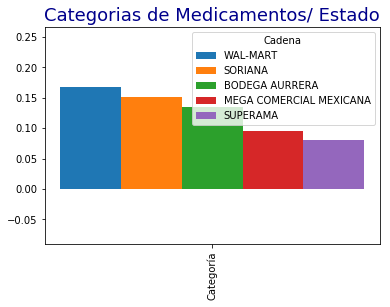

In [17]:


top5_chainperc = top5_chain / category_total
top5_chainperc.transpose().style.format("{:.2%}")

Top5ChainPerc = top5_chainperc.plot.bar()
Top5ChainPerc.set_title('Categorias de Medicamentos/ Estado', fontsize = 18, color= 'DarkBlue')
Top5ChainPerc.axis('equal')

chain_price = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Cadena'])['Precio'].mean().nlargest(5)
chain_price

#Chainpriceplot = chain_price.plot.barh()
#Chainpriceplot.set_title('Categorias de Medicamentos/ Estado', fontsize = 18, color= 'DarkBlue')







# Gráfica 8
## % del total de productos de la categoría medicamentos por Cadena Comercial
Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica7 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil


In [18]:
top5_chainprice = pd.DataFrame([chain_price])
#top5_chainprice.columns = top5_chain.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_chainprice.transpose()



,Precio
Cadena,
FARMACIA DEL HOSPITAL,536.142281
SANBORN S HNOS.,471.622358
FARMATODO,464.985363
I.S.S.S.T.E.,454.451348
SUPERMERCADOS SANTA FE,453.014864


# Gráfica 10
## % prima o descuento de precio promedio en medicamentos por el top 5 de Cadenas con mayor precio
Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica9 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil


In [19]:
top5_chainpriceperc = top5_chainprice / avg_medprice - 1
top5_chainpriceperc.transpose().style.format("{:.2%}")

top5_chainpriceperc

Cadena,FARMACIA DEL HOSPITAL,SANBORN S HNOS.,FARMATODO,I.S.S.S.T.E.,SUPERMERCADOS SANTA FE
Precio,0.412318,0.242358,0.224875,0.197126,0.193342
